In [1100]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats


In [1101]:

data = pd.read_csv('cancellations_scotland_january_2024.csv')
print(data.shape)
data.head()

(105, 14)


,Month,Country,TotalOperations,TotalOperationsQF,TotalCancelled,TotalCancelledQF,CancelledByPatientReason,CancelledByPatientReasonQF,ClinicalReason,ClinicalReasonQF,NonClinicalCapacityReason,NonClinicalCapacityReasonQF,OtherReason,OtherReasonQF
0,201505,S92000003,28810,NaN,2695,NaN,1057,NaN,853,NaN,523,NaN,262,NaN
1,201506,S92000003,30941,NaN,2800,NaN,1194,NaN,870,NaN,449,NaN,287,NaN
2,201507,S92000003,27725,NaN,2642,NaN,1083,NaN,854,NaN,457,NaN,248,NaN
3,201508,S92000003,28948,NaN,2630,NaN,1080,NaN,912,NaN,491,NaN,147,NaN
4,201509,S92000003,30938,NaN,2829,NaN,1122,NaN,1000,NaN,535,NaN,172,NaN


In [1102]:

data_board = pd.read_csv('cancellations_by_board_january_2024.csv')
data_board = data_board.rename(columns={'HBT': 'HB'})
print(data_board.shape)
data_board.head()



(1575, 14)


,Month,HB,TotalOperations,TotalOperationsQF,TotalCancelled,TotalCancelledQF,CancelledByPatientReason,CancelledByPatientReasonQF,ClinicalReason,ClinicalReasonQF,NonClinicalCapacityReason,NonClinicalCapacityReasonQF,OtherReason,OtherReasonQF
0,201505,S08000015,1861,NaN,178,NaN,52,NaN,70,NaN,27,NaN,29,NaN
1,201505,S08000016,457,NaN,66,NaN,11,NaN,10,NaN,45,NaN,0,NaN
2,201505,S08000017,1433,NaN,113,NaN,33,NaN,56,NaN,15,NaN,9,NaN
3,201505,S08000019,1250,NaN,91,NaN,40,NaN,34,NaN,10,NaN,7,NaN
4,201505,S08000020,3310,NaN,264,NaN,110,NaN,71,NaN,76,NaN,7,NaN


In [1103]:
hb = pd.read_csv('hb14_hb19.csv')
hb.head()

,HB,HBName,HBDateEnacted,HBDateArchived,Country
0,S08000015,NHS Ayrshire and Arran,20140401,NaN,S92000003
1,S08000016,NHS Borders,20140401,NaN,S92000003
2,S08000017,NHS Dumfries and Galloway,20140401,NaN,S92000003
3,S08000018,NHS Fife,20140401,20180201.0,S92000003
4,S08000019,NHS Forth Valley,20140401,NaN,S92000003


In [1104]:
#Add hb names to data_board

data_board = data_board.merge(hb[['HB', 'HBName']], on='HB', how='left')
data_board.head()



,Month,HB,TotalOperations,TotalOperationsQF,TotalCancelled,TotalCancelledQF,CancelledByPatientReason,CancelledByPatientReasonQF,ClinicalReason,ClinicalReasonQF,NonClinicalCapacityReason,NonClinicalCapacityReasonQF,OtherReason,OtherReasonQF,HBName
0,201505,S08000015,1861,NaN,178,NaN,52,NaN,70,NaN,27,NaN,29,NaN,NHS Ayrshire and Arran
1,201505,S08000016,457,NaN,66,NaN,11,NaN,10,NaN,45,NaN,0,NaN,NHS Borders
2,201505,S08000017,1433,NaN,113,NaN,33,NaN,56,NaN,15,NaN,9,NaN,NHS Dumfries and Galloway
3,201505,S08000019,1250,NaN,91,NaN,40,NaN,34,NaN,10,NaN,7,NaN,NHS Forth Valley
4,201505,S08000020,3310,NaN,264,NaN,110,NaN,71,NaN,76,NaN,7,NaN,NHS Grampian


In [1105]:

data_hospital = pd.read_csv('cancellations_by_hospital_january_2024.csv')
data_hospital = data_hospital.rename(columns={'Hospital': 'TreatmentLocationCode'})
print(data_hospital.shape)
data_hospital.head()


(4502, 14)


,Month,TreatmentLocationCode,TotalOperations,TotalOperationsQF,TotalCancelled,TotalCancelledQF,CancelledByPatientReason,CancelledByPatientReasonQF,ClinicalReason,ClinicalReasonQF,NonClinicalCapacityReason,NonClinicalCapacityReasonQF,OtherReason,OtherReasonQF
0,201505,A111H,884,NaN,67,NaN,21,NaN,25,NaN,16,NaN,5,NaN
1,201506,A111H,945,NaN,84,NaN,39,NaN,30,NaN,12,NaN,3,NaN
2,201507,A111H,948,NaN,72,NaN,25,NaN,33,NaN,6,NaN,8,NaN
3,201508,A111H,882,NaN,74,NaN,42,NaN,18,NaN,12,NaN,2,NaN
4,201509,A111H,845,NaN,67,NaN,32,NaN,30,NaN,3,NaN,2,NaN


In [1106]:
hospitals = pd.read_csv('hospitals.csv')
hospitals = hospitals.rename(columns={'HospitalCode': 'TreatmentLocationCode'})
hospitals = hospitals.rename(columns={'HealthBoard': 'HB'})
hospitals.head()


,_id,TreatmentLocationCode,HospitalName,AddressLine1,AddressLine2,AddressLine2QF,AddressLine3,AddressLine3QF,AddressLine4,AddressLine4QF,Postcode,HB,HSCP,CouncilArea,IntermediateZone,DataZone
0,1,A101H,Arran War Memorial Hospital,Lamlash,Isle of Arran,NaN,NaN,z,NaN,z,KA278LF,S08000015,S37000020,S12000021,S02002097,S01011176
1,2,A103H,Ayrshire Central Hospital,Kilwinning Road,Irvine,NaN,NaN,z,NaN,z,KA128SS,S08000015,S37000020,S12000021,S02002105,S01011213
2,3,A105H,Kirklandside Hospital,Kirklandside,Kilmarnock,NaN,Ayrshire,NaN,NaN,z,KA1 5LH,S08000015,S37000008,S12000008,S02001492,S01007961
3,4,A110H,Lady Margaret Hospital,College St,Millport,NaN,Isle of Cumbrae,NaN,NaN,z,KA280HF,S08000015,S37000020,S12000021,S02002128,S01011328
4,5,A111H,University Hospital Crosshouse,Kilmarnock Road,Kilmarnock,NaN,Ayrshire,NaN,NaN,z,KA2 0BE,S08000015,S37000008,S12000008,S02001504,S01008027


In [1107]:
#add hospital names to data_hospital

data_hospital = data_hospital.merge(hospitals[['TreatmentLocationCode', 'HospitalName', 'HB']], on='TreatmentLocationCode', how='left')
data_hospital.head()

,Month,TreatmentLocationCode,TotalOperations,TotalOperationsQF,TotalCancelled,TotalCancelledQF,CancelledByPatientReason,CancelledByPatientReasonQF,ClinicalReason,ClinicalReasonQF,NonClinicalCapacityReason,NonClinicalCapacityReasonQF,OtherReason,OtherReasonQF,HospitalName,HB
0,201505,A111H,884,NaN,67,NaN,21,NaN,25,NaN,16,NaN,5,NaN,University Hospital Crosshouse,S08000015
1,201506,A111H,945,NaN,84,NaN,39,NaN,30,NaN,12,NaN,3,NaN,University Hospital Crosshouse,S08000015
2,201507,A111H,948,NaN,72,NaN,25,NaN,33,NaN,6,NaN,8,NaN,University Hospital Crosshouse,S08000015
3,201508,A111H,882,NaN,74,NaN,42,NaN,18,NaN,12,NaN,2,NaN,University Hospital Crosshouse,S08000015
4,201509,A111H,845,NaN,67,NaN,32,NaN,30,NaN,3,NaN,2,NaN,University Hospital Crosshouse,S08000015


In [1108]:
#drop empty columns (QF columns)

data = data.dropna(axis=1, how='all')
data_board = data_board.dropna(axis=1, how='all')
data_hospital = data_hospital.dropna(axis=1, how='all')

In [1109]:
#print columns
print(data.columns)
print(data_board.columns)
print(data_hospital.columns)

Index(['Month', 'Country', 'TotalOperations', 'TotalCancelled',
       'CancelledByPatientReason', 'ClinicalReason',
       'NonClinicalCapacityReason', 'OtherReason'],
      dtype='object')
Index(['Month', 'HB', 'TotalOperations', 'TotalCancelled',
       'CancelledByPatientReason', 'ClinicalReason',
       'NonClinicalCapacityReason', 'OtherReason', 'HBName'],
      dtype='object')
Index(['Month', 'TreatmentLocationCode', 'TotalOperations', 'TotalCancelled',
       'CancelledByPatientReason', 'ClinicalReason',
       'NonClinicalCapacityReason', 'OtherReason', 'HospitalName', 'HB'],
      dtype='object')


In [1110]:
#check for missing values and duplicates
print(data.isnull().sum())
print("-------------------")
print(data_board.isnull().sum())
print("-------------------")
print(data_hospital.isnull().sum())

Month                        0
Country                      0
TotalOperations              0
TotalCancelled               0
CancelledByPatientReason     0
ClinicalReason               0
NonClinicalCapacityReason    0
OtherReason                  0
dtype: int64
-------------------
Month                          0
HB                             1
TotalOperations                0
TotalCancelled                 0
CancelledByPatientReason       0
ClinicalReason                 0
NonClinicalCapacityReason      0
OtherReason                    0
HBName                       105
dtype: int64
-------------------
Month                          0
TreatmentLocationCode          0
TotalOperations                0
TotalCancelled                 0
CancelledByPatientReason       0
ClinicalReason                 0
NonClinicalCapacityReason      0
OtherReason                    0
HospitalName                 276
HB                           276
dtype: int64


In [1111]:

hb_set = set(hb['HB'].values)
data_board_set = set(data_board['HB'].values)

# Elements in hb_set but not in data_board_set
difference_hb_data_board = hb_set - data_board_set
print("Elements in hb but not in data_board: ", difference_hb_data_board)


# Elements in data_board_set but not in hb_set
difference_data_board_hb = data_board_set - hb_set
print("Elements in data_board but not in hb: ", difference_data_board_hb)


Elements in hb but not in data_board:  {'S08000027', 'S08000023', 'S08000021', 'S08000018'}
Elements in data_board but not in hb:  {nan, 'SB0801'}


In [1112]:
#drop row with null

print(data_board.shape)

data_board = data_board.dropna(subset=['HB'])

#drop row with lone hospital
data_board = data_board[data_board.HB != 'SB0801']

print(data_board.shape)


(1575, 9)
(1470, 9)


In [1113]:
print(data_board.isnull().sum())

Month                        0
HB                           0
TotalOperations              0
TotalCancelled               0
CancelledByPatientReason     0
ClinicalReason               0
NonClinicalCapacityReason    0
OtherReason                  0
HBName                       0
dtype: int64


In [1114]:
#Descrptive staitsitcs

print(data.describe())

               Month  TotalOperations  TotalCancelled  \
count     105.000000       105.000000      105.000000   
mean   201926.600000     24465.828571     2221.628571   
std       254.772281      6122.557942      674.535243   
min    201505.000000      3406.000000      311.000000   
25%    201707.000000     20587.000000     1854.000000   
50%    201909.000000     26018.000000     2348.000000   
75%    202111.000000     29271.000000     2706.000000   
max    202401.000000     32113.000000     3646.000000   

       CancelledByPatientReason  ClinicalReason  NonClinicalCapacityReason  \
count                105.000000      105.000000                 105.000000   
mean                 802.704762      782.780952                 533.571429   
std                  291.845353      206.297208                 199.990618   
min                   82.000000      161.000000                  53.000000   
25%                  655.000000      653.000000                 453.000000   
50%               

In [1115]:
hospitals_set = set(hospitals['TreatmentLocationCode'].values)
data_hospital_set = set(data_hospital['TreatmentLocationCode'].values)

# Elements in hospitals_set but not in data_hospital_set
difference_hospitals_data_hospital = hospitals_set - data_hospital_set
print("Elements in hospitals but not in data_hospital: ", difference_hospitals_data_hospital)

# Elements in data_hospital_set but not in hospitals_set
difference_data_hospital_hospitals = data_hospital_set - hospitals_set
print("Elements in data_hospital but not in hospitals: ", difference_data_hospital_hospitals)

Elements in hospitals but not in data_hospital:  {'A211H', 'C108H', 'H219H', 'B128H', 'S312H', 'T305H', 'A208H', 'T116H', 'N431H', 'Y120H', 'N106H', 'L206H', 'H221H', 'C114H', 'G608H', 'S234H', 'S310H', 'C113H', 'Y114H', 'B114H', 'G611H', 'Y126H', 'N332H', 'T121H', 'N334H', 'N103H', 'Y129H', 'D101H', 'Y106H', 'S107H', 'G113H', 'N198H', 'N432H', 'H101H', 'V201H', 'V215H', 'T115H', 'G605H', 'T113H', 'A105H', 'T320H', 'N335H', 'G599H', 'G607H', 'H228H', 'H106H', 'N492H', 'T309H', 'Y145H', 'N495H', 'C204H', 'N401E', 'A214H', 'H226H', 'L395E', 'G504H', 'Y132H', 'T322H', 'T122H', 'G609H', 'H225H', 'S235H', 'L307H', 'S320H', 'T120H', 'S307H', 'L209H', 'A112H', 'T321H', 'T123H', 'B122H', 'H213H', 'G517H', 'C419H', 'A114H', 'N181H', 'S108H', 'S232H', 'S318H', 'S321H', 'N151H', 'B130H', 'G612H', 'N104H', 'T317H', 'N496H', 'Y134H', 'Y135H', 'Y142H', 'N183H', 'A110H', 'N352H', 'G610H', 'N331H', 'S315H', 'A215H', 'H224H', 'W106H', 'Y138H', 'T325H', 'S240H', 'A202E', 'G110H', 'N336H', 'L103H', 'G112

In [1116]:
#cancellations by board

totals_by_board = data_board.groupby('HBName')[['TotalCancelled', 'TotalOperations', 'CancelledByPatientReason', 'ClinicalReason', 'NonClinicalCapacityReason', 'OtherReason']].sum().reset_index()

totals_by_board['CancellationRate'] = totals_by_board['TotalCancelled'] / totals_by_board['TotalOperations']
totals_by_board['CancellationRate'] = totals_by_board['CancellationRate'] * 100

totals_by_board['PatientCancellationRate'] = totals_by_board['CancelledByPatientReason'] / totals_by_board['TotalCancelled']
totals_by_board['PatientCancellationRate'] = totals_by_board['PatientCancellationRate'] * 100

totals_by_board['ClinicalCancellationRate'] = totals_by_board['ClinicalReason'] / totals_by_board['TotalCancelled']
totals_by_board['ClinicalCancellationRate'] = totals_by_board['ClinicalCancellationRate'] * 100

totals_by_board['NonClinicalCancellationRate'] = totals_by_board['NonClinicalCapacityReason'] / totals_by_board['TotalCancelled']
totals_by_board['NonClinicalCancellationRate'] = totals_by_board['NonClinicalCancellationRate'] * 100

totals_by_board['OtherCancellationRate'] = totals_by_board['OtherReason'] / totals_by_board['TotalCancelled']
totals_by_board['OtherCancellationRate'] = totals_by_board['OtherCancellationRate'] * 100

totals_by_board = totals_by_board.sort_values(by='CancellationRate', ascending=False)
totals_by_board.head()

print(totals_by_board.columns)
totals_by_board.head()

Index(['HBName', 'TotalCancelled', 'TotalOperations',
       'CancelledByPatientReason', 'ClinicalReason',
       'NonClinicalCapacityReason', 'OtherReason', 'CancellationRate',
       'PatientCancellationRate', 'ClinicalCancellationRate',
       'NonClinicalCancellationRate', 'OtherCancellationRate'],
      dtype='object')


,HBName,TotalCancelled,TotalOperations,CancelledByPatientReason,ClinicalReason,NonClinicalCapacityReason,OtherReason,CancellationRate,PatientCancellationRate,ClinicalCancellationRate,NonClinicalCancellationRate,OtherCancellationRate
7,NHS Highland,13865,110080,5039,3812,4928,86,12.595385,36.343310,27.493689,35.542734,0.620267
9,NHS Lothian,48812,449077,21047,14042,10454,3269,10.869405,43.118495,28.767516,21.416865,6.697124
0,NHS Ayrshire and Arran,15721,152999,4809,6991,3072,849,10.275231,30.589657,44.469181,19.540742,5.400420
1,NHS Borders,3477,34069,888,807,1731,51,10.205759,25.539258,23.209664,49.784297,1.466782
8,NHS Lanarkshire,19932,202011,8791,6625,3838,678,9.866789,44.104957,33.238009,19.255469,3.401565


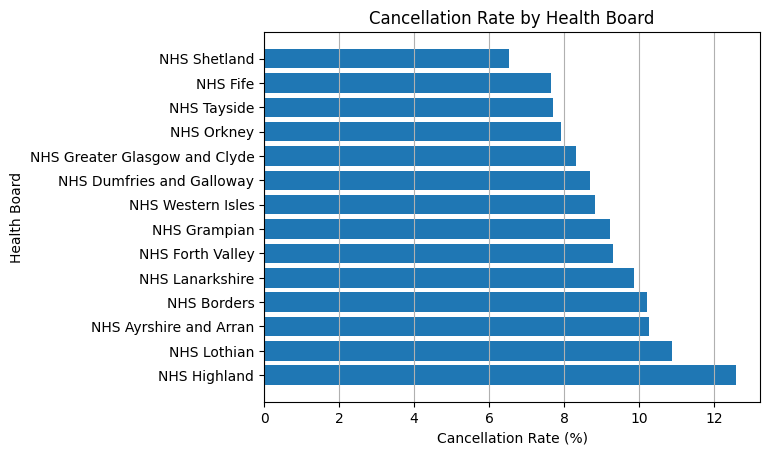

In [1117]:
#plot cancellation percentage by board

plt.barh(totals_by_board['HBName'], totals_by_board['CancellationRate'])
plt.xlabel('Cancellation Rate (%)')
plt.ylabel('Health Board')
plt.title('Cancellation Rate by Health Board')
plt.grid(axis='x')
plt.show()



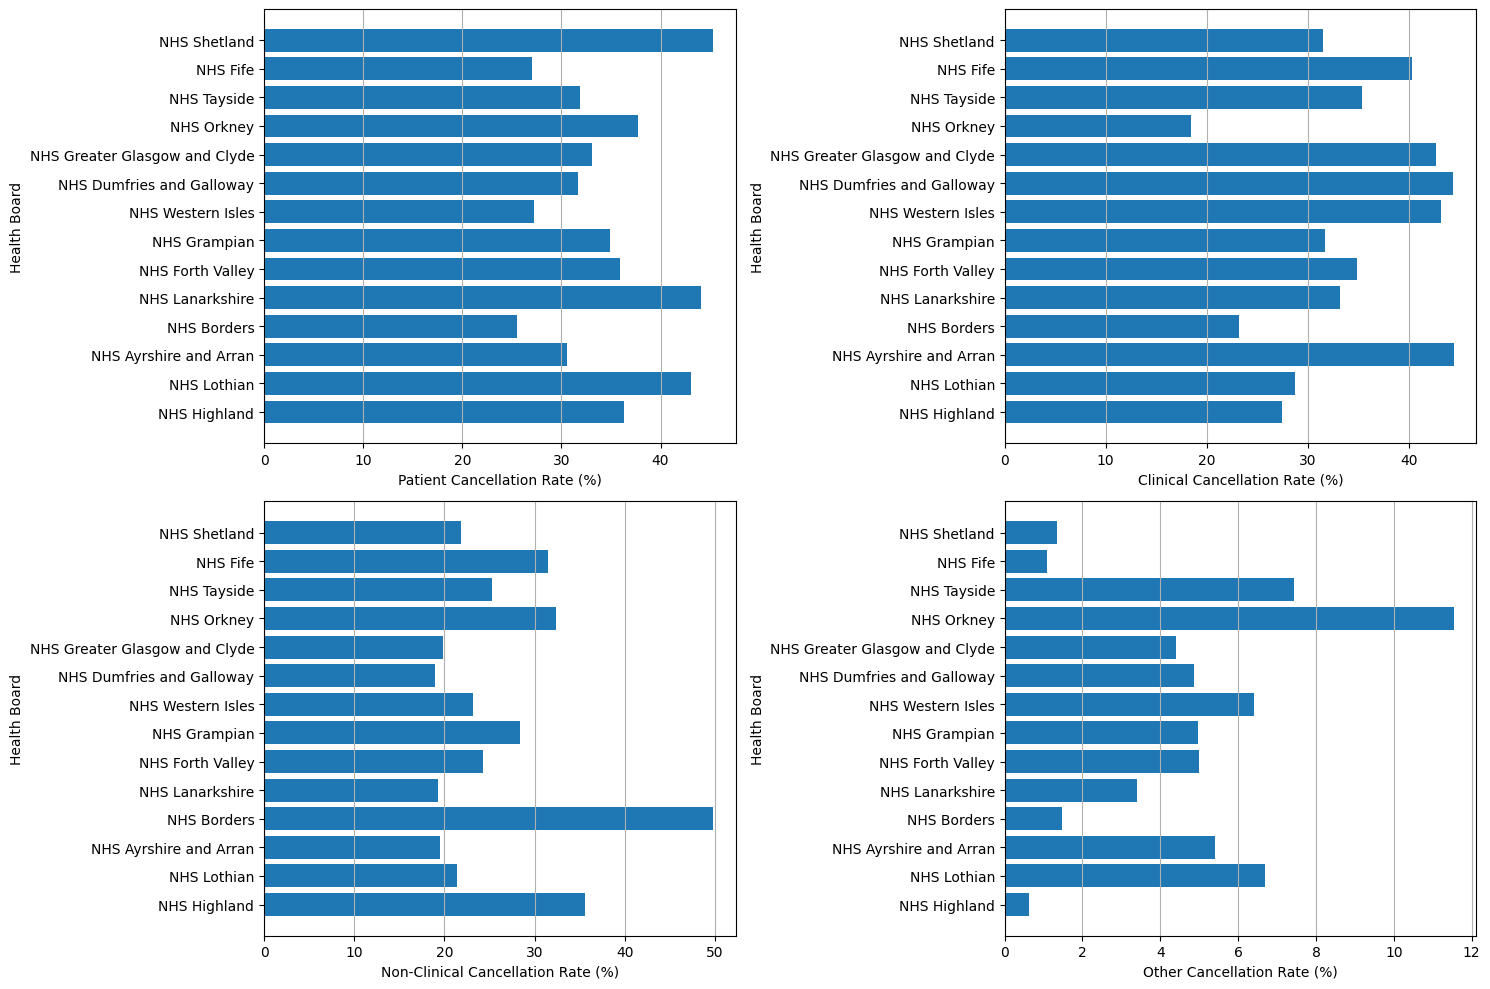

In [1118]:


tfig, axs = plt.subplots(2, 2, figsize=(15, 10))


axs[0, 0].barh(totals_by_board['HBName'], totals_by_board['PatientCancellationRate'])
axs[0, 0].set_xlabel('Patient Cancellation Rate (%)')
axs[0, 0].set_ylabel('Health Board')
axs[0, 0].grid(axis='x')


axs[0, 1].barh(totals_by_board['HBName'], totals_by_board['ClinicalCancellationRate'])
axs[0, 1].set_xlabel('Clinical Cancellation Rate (%)')
axs[0, 1].set_ylabel('Health Board')
axs[0, 1].grid(axis='x')


axs[1, 0].barh(totals_by_board['HBName'], totals_by_board['NonClinicalCancellationRate'])
axs[1, 0].set_xlabel('Non-Clinical Cancellation Rate (%)')
axs[1, 0].set_ylabel('Health Board')
axs[1, 0].grid(axis='x')


axs[1, 1].barh(totals_by_board['HBName'], totals_by_board['OtherCancellationRate'])
axs[1, 1].set_xlabel('Other Cancellation Rate (%)')
axs[1, 1].set_ylabel('Health Board')
axs[1, 1].grid(axis='x')

plt.tight_layout()
plt.show()


In [1119]:
data_board['CancellationRate'] = data_board['TotalCancelled'] / data_board['TotalOperations']
data_board['CancellationRate'] = data_board['CancellationRate'] * 100

data_board['PatientCancellationRate'] = data_board['CancelledByPatientReason'] / data_board['TotalCancelled']
data_board['PatientCancellationRate'] = data_board['PatientCancellationRate'] * 100

data_board['ClinicalCancellationRate'] = data_board['ClinicalReason'] / data_board['TotalCancelled']
data_board['ClinicalCancellationRate'] = data_board['ClinicalCancellationRate'] * 100

data_board['NonClinicalCancellationRate'] = data_board['NonClinicalCapacityReason'] / data_board['TotalCancelled']
data_board['NonClinicalCancellationRate'] = data_board['NonClinicalCancellationRate'] * 100

data_board['OtherCancellationRate'] = data_board['OtherReason'] / data_board['TotalCancelled']
data_board['OtherCancellationRate'] = data_board['OtherCancellationRate'] * 100

In [1120]:
print(totals_by_board.describe())



       TotalCancelled  TotalOperations  CancelledByPatientReason  \
count       14.000000        14.000000                 14.000000   
mean     15957.142857    170899.285714               5767.071429   
std      15374.598646    164241.333491               6073.713735   
min        922.000000     10445.000000                251.000000   
25%       4863.000000     49800.500000               1328.000000   
50%      13167.500000    135827.000000               4281.000000   
75%      18879.250000    198504.000000               7572.500000   
max      48812.000000    573835.000000              21047.000000   

       ClinicalReason  NonClinicalCapacityReason  OtherReason  \
count       14.000000                  14.000000    14.000000   
mean      5654.285714                3766.500000   769.071429   
std       5641.347908                3190.278617   928.817732   
min        353.000000                 214.000000    15.000000   
25%       1391.000000                1845.750000    91.250000 

In [1121]:
data['Month'] = data['Month'].astype(str)
data['Year'] = data['Month'].str[:4]
cancellations_by_year = data.groupby('Year')['TotalCancelled'].sum()

cancellations_by_year.head()

Year
2015    22629
2016    34581
2017    30731
2018    32007
2019    29779
Name: TotalCancelled, dtype: int64

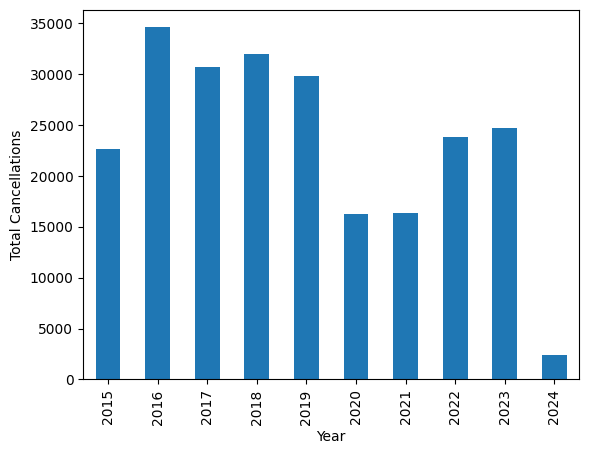

In [1122]:
#plot

cancellations_by_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Total Cancellations')

plt.show()


In [1123]:

operations_by_year = data.groupby('Year')['TotalCancelled'].sum()

operations_by_year.head()

Year
2015    22629
2016    34581
2017    30731
2018    32007
2019    29779
Name: TotalCancelled, dtype: int64

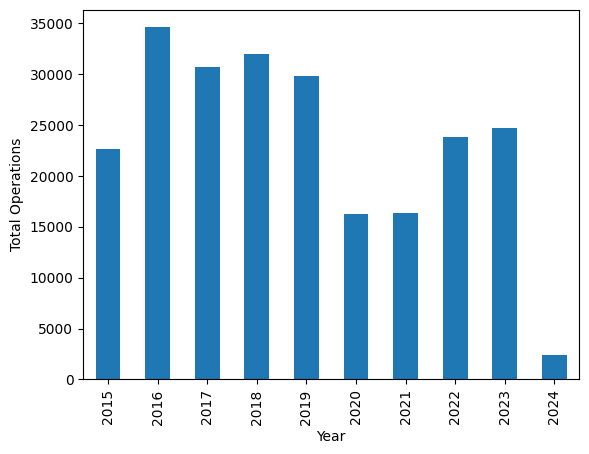

In [1124]:
#plot

operations_by_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Total Operations')

plt.show()


In [1125]:
#cancellation rate by month

cancellations_by_month = data.groupby('Month')['TotalCancelled'].sum()

from sklearn.linear_model import LinearRegression

X = np.arange(len(cancellations_by_month)).reshape(-1, 1)
y = cancellations_by_month.values

model = LinearRegression()

model.fit(X, y)


LinearRegression()

In [1126]:
cancellations_by_month_diff = cancellations_by_month.diff().dropna()

X_diff = np.arange(len(cancellations_by_month_diff)).reshape(-1, 1)
y_diff = cancellations_by_month_diff.values

model_diff = LinearRegression()

model_diff.fit(X_diff, y_diff)

LinearRegression()

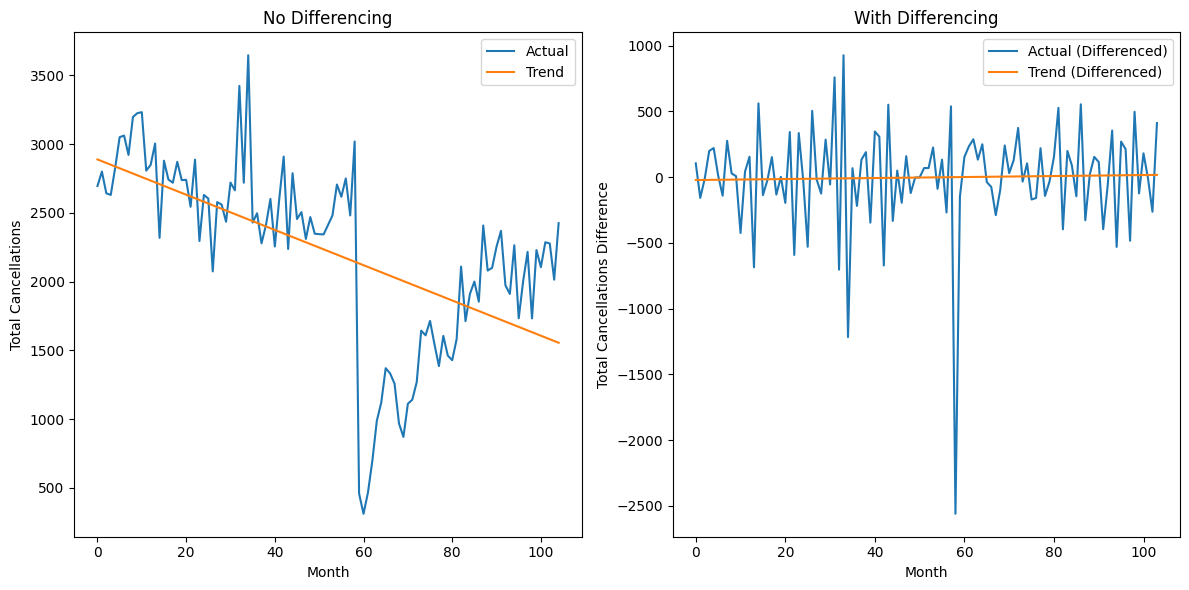

In [1127]:
#plot   


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.plot(X, y, label='Actual')
plt.plot(X, model.predict(X), label='Trend')
plt.xlabel('Month')
plt.ylabel('Total Cancellations')
plt.legend()
plt.title('No Differencing')


plt.subplot(1, 2, 2)
plt.plot(X_diff, y_diff, label='Actual (Differenced)')
plt.plot(X_diff, model_diff.predict(X_diff), label='Trend (Differenced)')
plt.xlabel('Month')
plt.ylabel('Total Cancellations Difference')
plt.legend()
plt.title('With Differencing')


plt.tight_layout()
plt.show()

In [1128]:
#print collumns

print(data.columns)

#data['CancellationRate'] = data['TotalCancelled'] / data['TotalOperations']

Index(['Month', 'Country', 'TotalOperations', 'TotalCancelled',
       'CancelledByPatientReason', 'ClinicalReason',
       'NonClinicalCapacityReason', 'OtherReason', 'Year'],
      dtype='object')


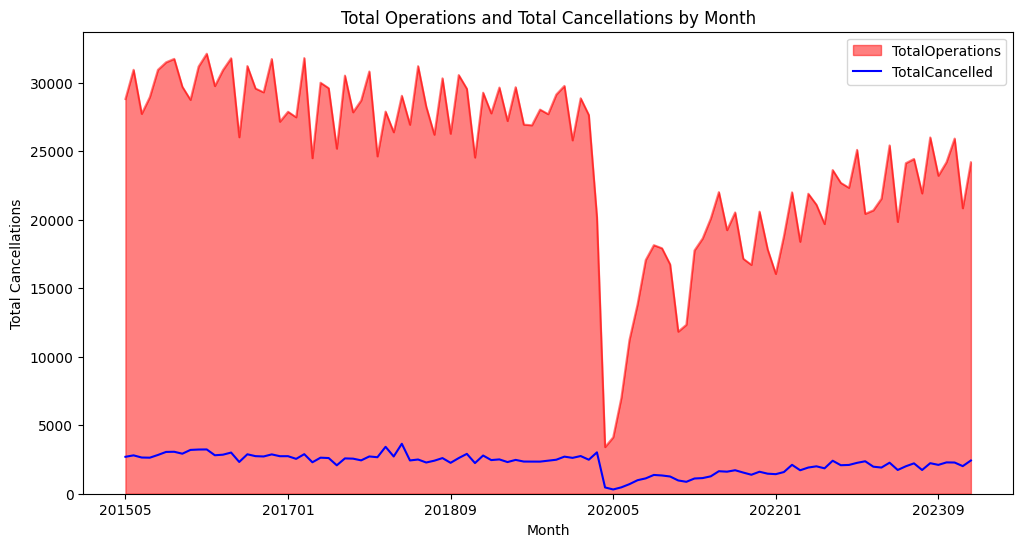

In [1129]:
#plot total cancellations by month



ax = data.plot(kind='area', x='Month', y='TotalOperations', figsize=(12, 6), alpha=0.5, color='red')


ax2 = data.plot(kind='line', x='Month', y='TotalCancelled', secondary_y=False, ax=ax, color='blue')

plt.title('Total Operations and Total Cancellations by Month')
plt.xlabel('Month')
ax.set_ylabel('Total Operations')
ax2.set_ylabel('Total Cancellations')

plt.show()


In [1130]:
data['CovidPeriod'] = data['Month'].apply(lambda x: 1 if x >= '202003' and x <= "202107" else 0)

data.head()

,Month,Country,TotalOperations,TotalCancelled,CancelledByPatientReason,ClinicalReason,NonClinicalCapacityReason,OtherReason,Year,CovidPeriod
0,201505,S92000003,28810,2695,1057,853,523,262,2015,0
1,201506,S92000003,30941,2800,1194,870,449,287,2015,0
2,201507,S92000003,27725,2642,1083,854,457,248,2015,0
3,201508,S92000003,28948,2630,1080,912,491,147,2015,0
4,201509,S92000003,30938,2829,1122,1000,535,172,2015,0


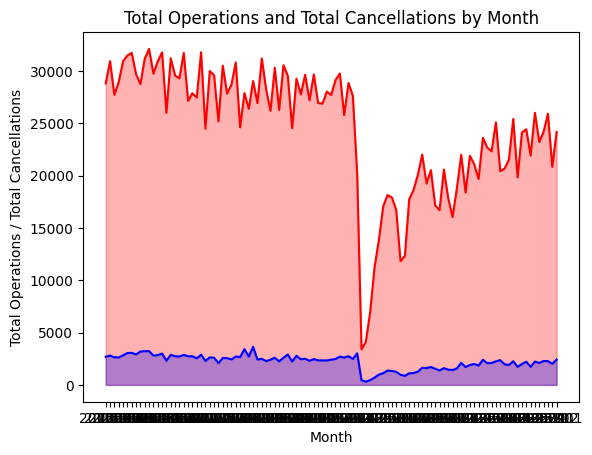

In [1131]:



sns.lineplot(data=data, x='Month', y='TotalOperations', color='red')
sns.lineplot(data=data, x='Month', y='TotalCancelled', color='blue')


plt.fill_between(data['Month'], data['TotalOperations'], color='red', alpha=0.3)
plt.fill_between(data['Month'], data['TotalCancelled'], color='blue', alpha=0.3)

plt.title('Total Operations and Total Cancellations by Month')
plt.xlabel('Month')
plt.ylabel('Total Operations / Total Cancellations')

plt.show()



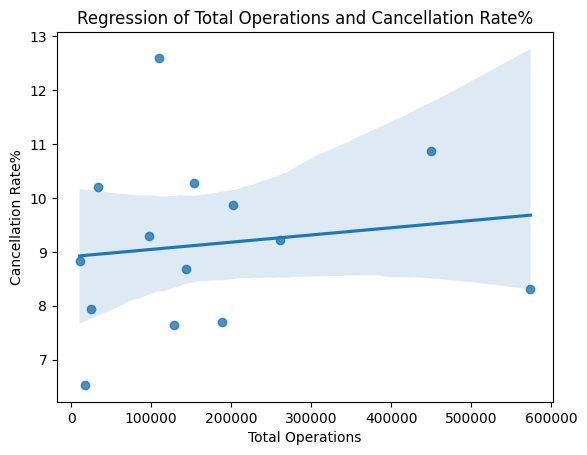

In [1132]:
totals_by_board.head()

import seaborn as sns


sns.regplot(data=totals_by_board, x='TotalOperations', y='CancellationRate')

plt.title('Regression of Total Operations and Cancellation Rate%')
plt.xlabel('Total Operations')
plt.ylabel('Cancellation Rate%')

plt.show()


In [1133]:
#totals by hospital

totals_by_hospital = data_hospital.groupby('TreatmentLocationCode')[['TotalCancelled', 'TotalOperations', 'CancelledByPatientReason', 'ClinicalReason', 'NonClinicalCapacityReason', 'OtherReason']].sum().reset_index()



totals_by_hospital.head()

#calculate cancellation rate

totals_by_hospital['CancellationRate'] = totals_by_hospital['TotalCancelled'] / totals_by_hospital['TotalOperations']*100



MAE: 1.8802840979657516
MSE: 6.310921044114738
RMSE: 2.51215466166292
R2: 0.0005712275957909796


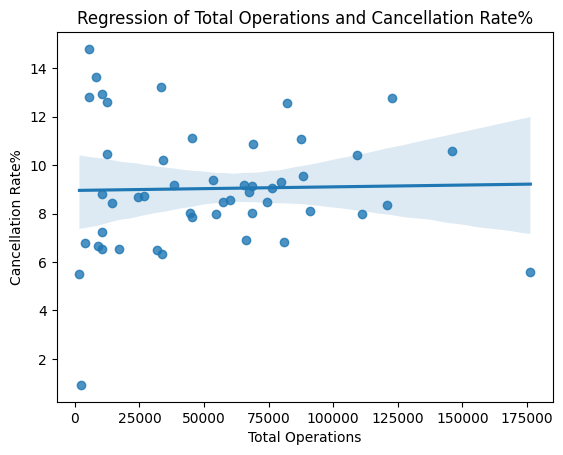

In [1134]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt


X = totals_by_hospital[['TotalOperations']]
y = totals_by_hospital['CancellationRate']


model = LinearRegression()
model.fit(X, y)


y_pred = model.predict(X)


mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')


sns.regplot(data=totals_by_hospital, x='TotalOperations', y='CancellationRate')

plt.title('Regression of Total Operations and Cancellation Rate%')
plt.xlabel('Total Operations')
plt.ylabel('Cancellation Rate%')

plt.show()

In [1135]:
data.head()

,Month,Country,TotalOperations,TotalCancelled,CancelledByPatientReason,ClinicalReason,NonClinicalCapacityReason,OtherReason,Year,CovidPeriod
0,201505,S92000003,28810,2695,1057,853,523,262,2015,0
1,201506,S92000003,30941,2800,1194,870,449,287,2015,0
2,201507,S92000003,27725,2642,1083,854,457,248,2015,0
3,201508,S92000003,28948,2630,1080,912,491,147,2015,0
4,201509,S92000003,30938,2829,1122,1000,535,172,2015,0


In [1136]:

data['MonthInt'] = data['Month'].apply(lambda x: int(x[4:]))

def getQuarter(month):
    if month >= 1 and month <= 3:
        return "Q1"
    if month >= 4 and month <= 6:
        return "Q2"
    if month >= 7 and month <= 9:
        return "Q3"
    return "Q4"

data['Quarter'] = data['MonthInt'].apply(getQuarter)

data.head()

,Month,Country,TotalOperations,TotalCancelled,CancelledByPatientReason,ClinicalReason,NonClinicalCapacityReason,OtherReason,Year,CovidPeriod,MonthInt,Quarter
0,201505,S92000003,28810,2695,1057,853,523,262,2015,0,5,Q2
1,201506,S92000003,30941,2800,1194,870,449,287,2015,0,6,Q2
2,201507,S92000003,27725,2642,1083,854,457,248,2015,0,7,Q3
3,201508,S92000003,28948,2630,1080,912,491,147,2015,0,8,Q3
4,201509,S92000003,30938,2829,1122,1000,535,172,2015,0,9,Q3


In [1137]:

# Convert 'Year' column to integer
data['Year'] = data['Year'].astype(int)


filtered_data = data[(data['Year'] >= 2016) & (data['Year'] <= 2023)]

quarter_year_data = filtered_data.groupby(['Year', 'Quarter'])['ClinicalReason'].sum()

print(quarter_year_data)



Year  Quarter
2016  Q1         3141
      Q2         3035
      Q3         2666
      Q4         2921
2017  Q1         2979
      Q2         2779
      Q3         2711
      Q4         2718
2018  Q1         2711
      Q2         2644
      Q3         2612
      Q4         2785
2019  Q1         2832
      Q2         2597
      Q3         2548
      Q4         2750
2020  Q1         2731
      Q2          573
      Q3         1353
      Q4         1674
2021  Q1         1157
      Q2         1747
      Q3         1679
      Q4         1699
2022  Q1         1809
      Q2         1958
      Q3         2057
      Q4         2221
2023  Q1         2154
      Q2         2104
      Q3         2177
      Q4         2342
Name: ClinicalReason, dtype: int64


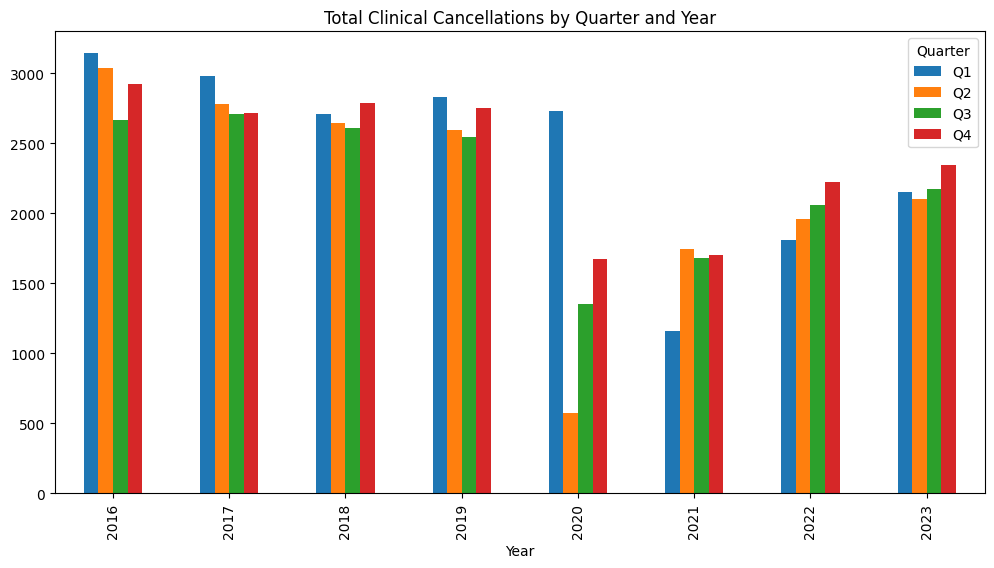

In [1138]:
#plot

quarter_year_data.unstack().plot(kind='bar', figsize=(12, 6))

plt.title('Total Clinical Cancellations by Quarter and Year')

plt.show()




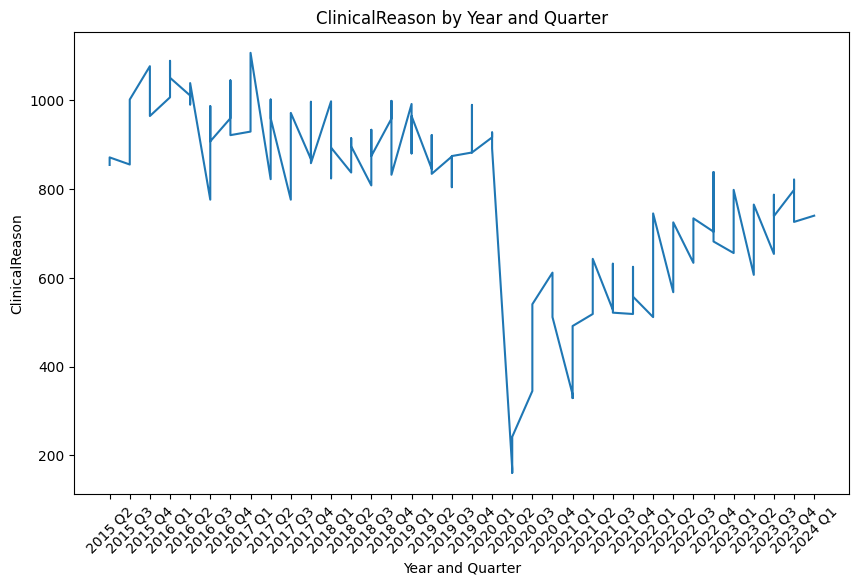

In [1139]:
import matplotlib.pyplot as plt


data_reset = data.reset_index()


data_reset['Year_Quarter'] = data_reset['Year'].astype(str) + ' ' + data_reset['Quarter']

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(data_reset['Year_Quarter'], data_reset['ClinicalReason'])
plt.xticks(rotation=45)
plt.xlabel('Year and Quarter')
plt.ylabel('ClinicalReason')
plt.title('ClinicalReason by Year and Quarter')
plt.show()

In [1140]:
group1 = data_reset[data_reset['Quarter'] == 'Q1']['ClinicalReason']
group2 = data_reset[data_reset['Quarter'] == 'Q2']['ClinicalReason']
group3 = data_reset[data_reset['Quarter'] == 'Q3']['ClinicalReason']
group4 = data_reset[data_reset['Quarter'] == 'Q4']['ClinicalReason']

1005, 1087, 1049, 928, 946, 1105, 996, 823, 892, 990, 879, 963, 915, 926, 890, 337, 329, 491, 511, 554, 744, 655, 702, 797, 739, 853, 870, 1009, 989, 1037, 821, 1000, 958, 836, 913, 895, 844, 920, 833, 170, 161, 242, 518, 587, 642, 567, 667, 724, 606, 734, 764, 854, 912, 1000, 775, 985, 906, 775, 966, 970, 807, 932, 873, 872, 803, 873, 345, 468, 540, 527, 631, 521, 633, 691, 733, 653, 786, 738, 1075, 1062, 963, 958, 1043, 920, 866, 995, 857, 957, 997, 831, 881, 988, 881, 611, 552, 511, 518, 624, 557, 703, 837, 681, 797, 820, 725


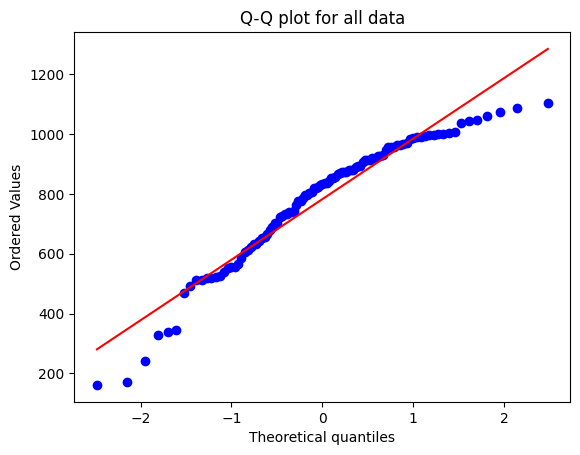

In [1141]:



all_data = np.concatenate([group1, group2, group3, group4])


all_data_list = all_data.tolist()


all_data_str = [str(element) for element in all_data_list]


all_data_str = ', '.join(all_data_str)

print(all_data_str)


stats.probplot(all_data, dist="norm", plot=plt)
plt.title('Q-Q plot for all data')
plt.show()

In [1143]:
#just for funsies 
statistic, p_value = stats.shapiro(all_data)



alpha = 0.05
if p_value > alpha:
    print("Data looks Gaussian (fail to reject H0)")
else:
    print("Data does not look Gaussian (reject H0)")
    
print(statistic, p_value)

Data does not look Gaussian (reject H0)
0.9353975653648376 6.826950266258791e-05


In [ ]:

f_value, p_value = stats.f_oneway(group1, group2, group3, group4)

print("One-way ANOVA:")
print("F =", f_value)
print("p-value =", p_value)